In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [2]:
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"


Plot metrics

In [10]:
maxent_results0 = pd.read_csv("/Users/liting/Documents/GitHub/r_chagasM/output/figures/combined_mean_std_0126.csv")
rf_results = pd.read_csv("/Users/liting/Documents/GitHub/r_chagasM/output/rf/combined_mean_std.csv")
bug_name_list_full = ['T. sanguisuga','T. dimidiata','T. gerstaeckeri','T. protracta','T. longipennis','T. rubida','M. pallidipennis','T. barberi','T. mexicana','P. lecticularia','T. recurva','T. mazzottii','P. hirsuta','T. indictiva']
bug_lower_name_list = ['san','dim','ger','pro','lon','rub','pal','bar','mex','lec','rec','maz','hir','ind']
bug_upper_name_list = ['San','Dim','Ger','Pro','Lon','Rub','Pal','Bar','Mex','Lec','Rec','Maz','Hir','Ind']

In [5]:
maxent_results= maxent_results0[maxent_results0["method_name"]=="pixel_buffer_off"]

In [6]:
rf_results

,auc_mean,auc_std,mae_mean,mae_std,bias_mean,bias_std,tss_mean,tss_std,tss_threshold_mean,tss_threshold_std,species,method_name
0,0.997053,0.001309,0.034336,0.004058,-0.026309,0.004189,0.949767,0.011592,0.638300,0.017511,San,pixel_buffer_off
1,0.999441,0.000254,0.015530,0.002485,-0.013053,0.003215,0.978480,0.011847,0.696100,0.011453,Dim,pixel_buffer_off
2,0.998900,0.000614,0.030885,0.001977,-0.026567,0.003008,0.950659,0.019821,0.696700,0.010068,Ger,pixel_buffer_off
3,0.992728,0.001173,0.057211,0.003973,-0.049904,0.004570,0.895565,0.030921,0.677000,0.022849,Pro,pixel_buffer_off
4,0.999315,0.000552,0.021128,0.004673,-0.019752,0.004496,0.971806,0.027892,0.695000,0.041769,Lon,pixel_buffer_off
5,0.994519,0.002833,0.047922,0.005471,-0.044859,0.005280,0.922502,0.039246,0.680100,0.029393,Rub,pixel_buffer_off
6,0.999566,0.000342,0.017920,0.002254,-0.016955,0.002493,0.974647,0.022390,0.715221,0.035424,Pal,pixel_buffer_off
7,0.999368,0.000493,0.020574,0.001669,-0.019396,0.001406,0.959037,0.023901,0.729700,0.014428,Bar,pixel_buffer_off
8,0.999392,0.000550,0.025258,0.002511,-0.024598,0.002456,0.962215,0.044112,0.812300,0.011993,Mex,pixel_buffer_off
9,0.990229,0.009009,0.078548,0.004271,-0.076429,0.004597,0.870312,0.100451,0.673300,0.012427,Lec,pixel_buffer_off


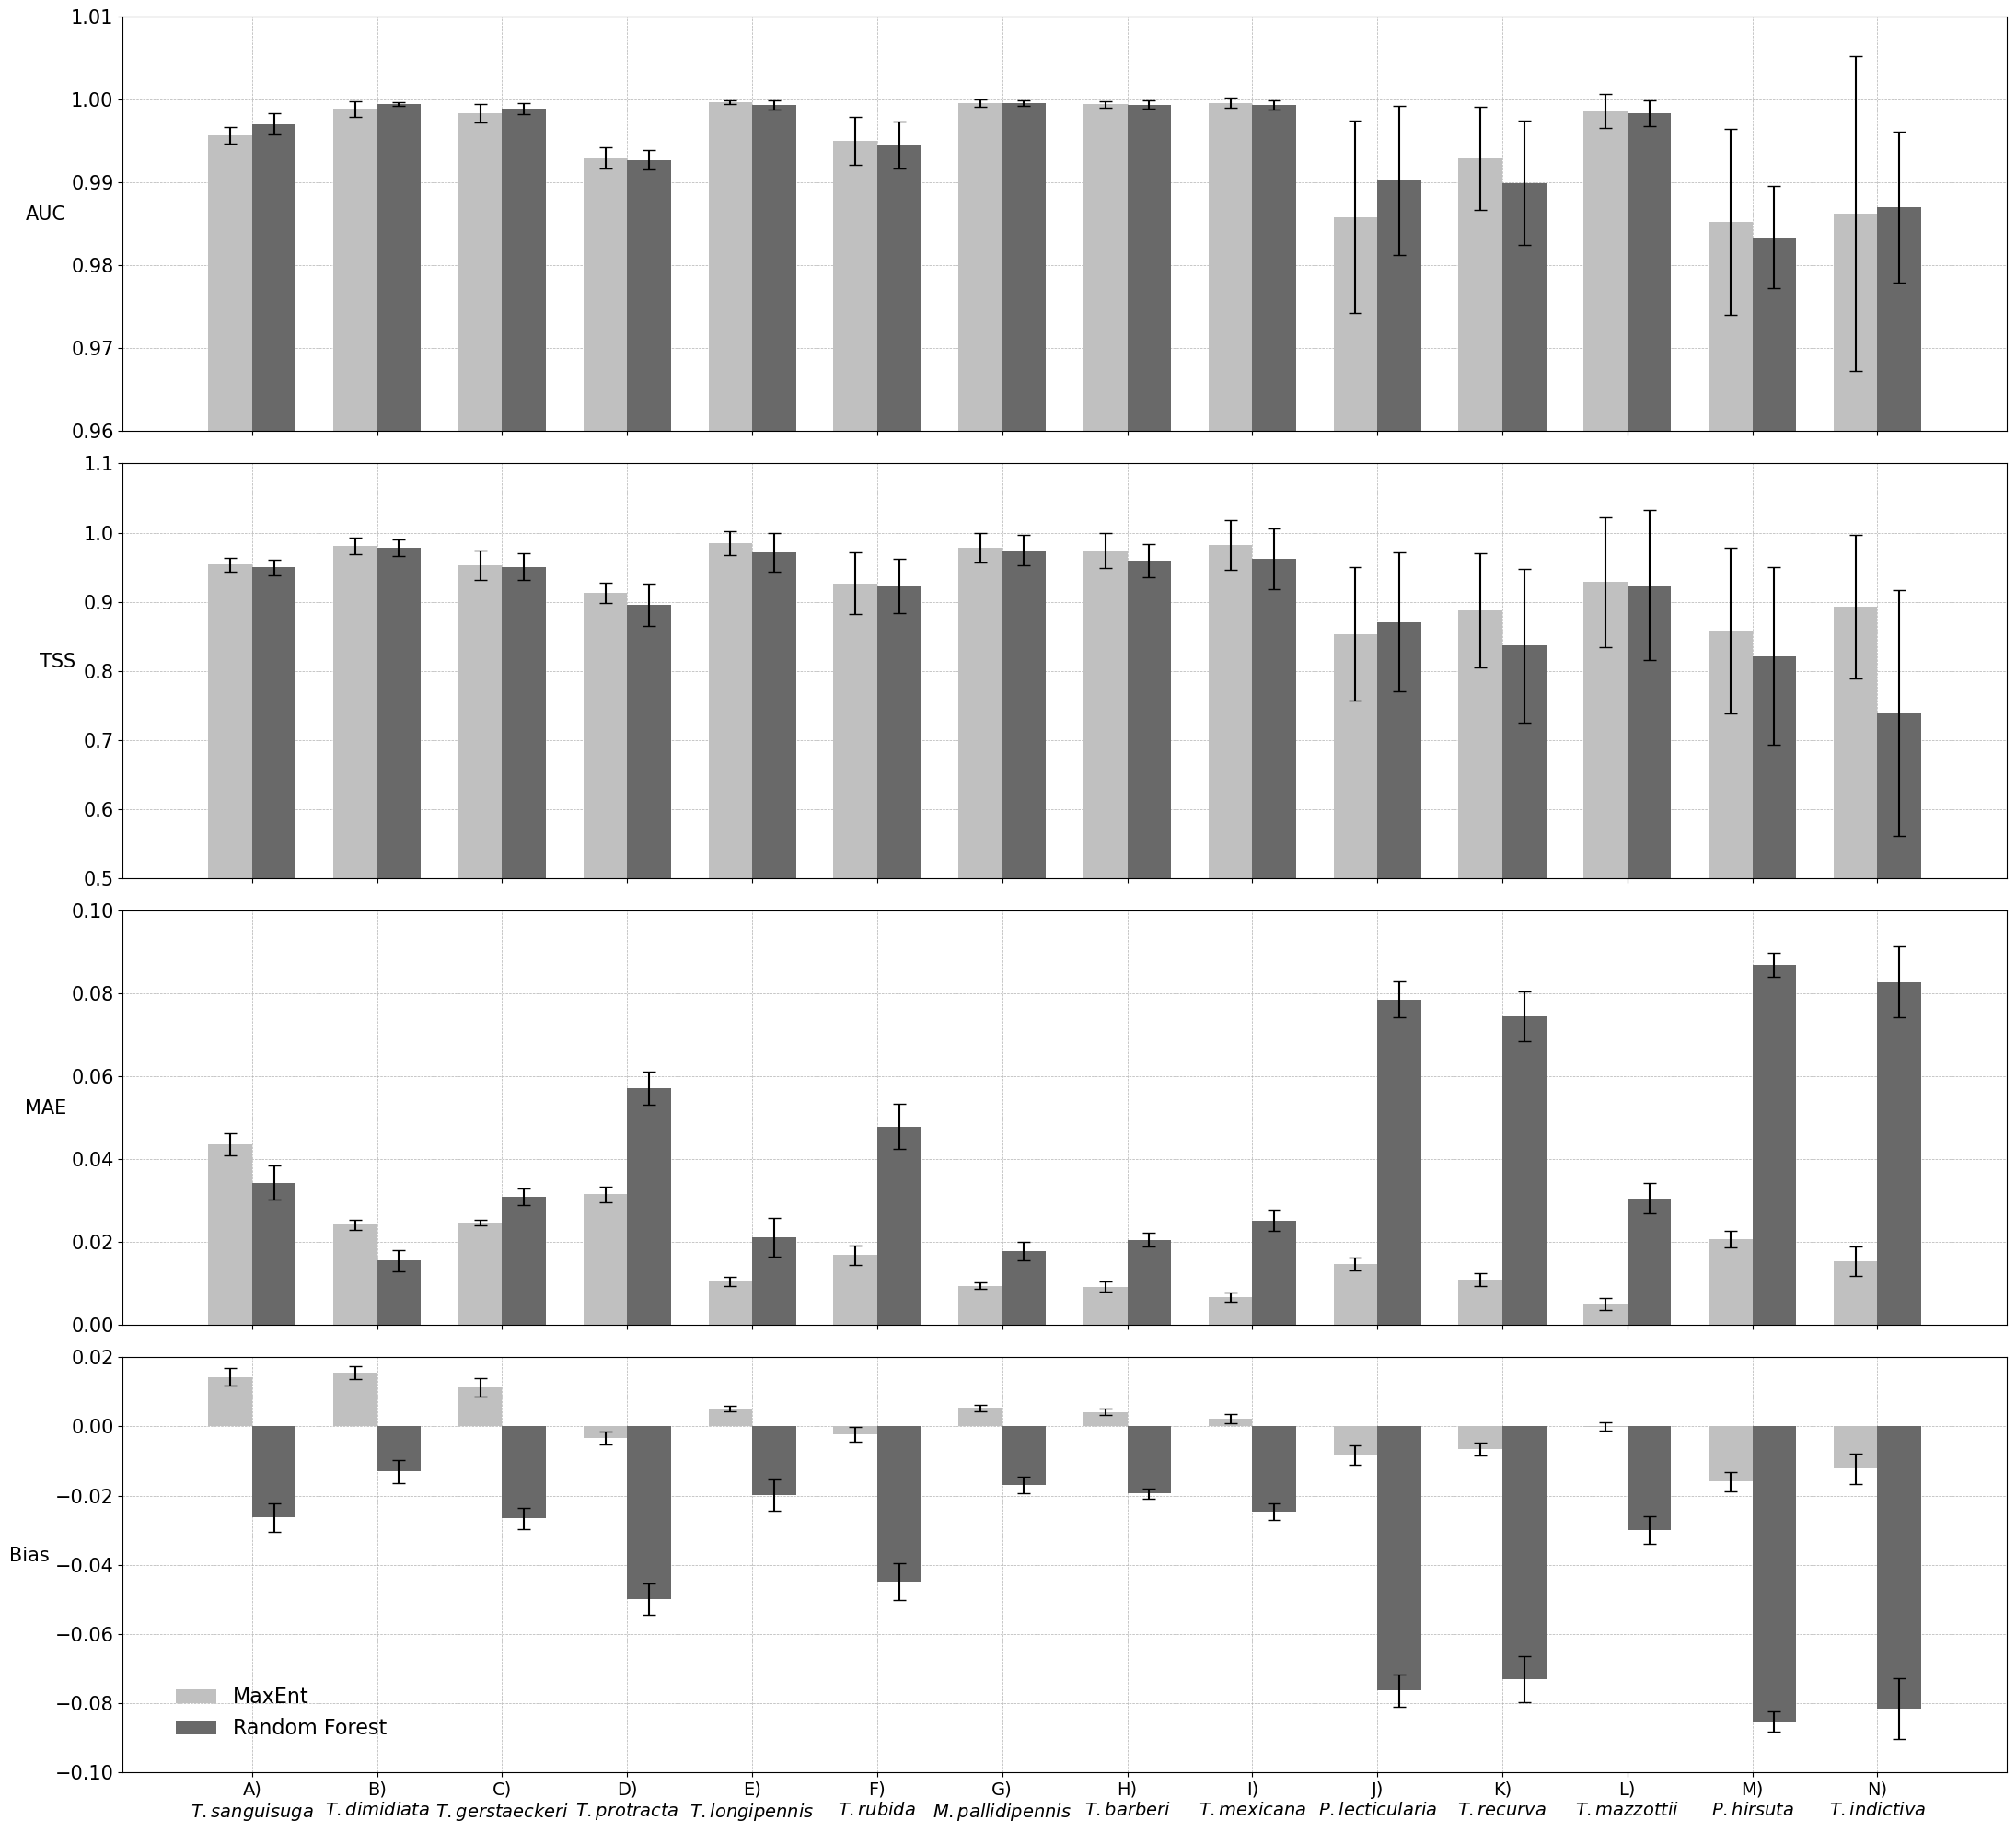

In [16]:
# Ensure the order of species matches the order of bug_name_list_full
order = [maxent_results['species'].tolist().index(s) for s in bug_upper_name_list]
maxent_results = maxent_results.iloc[order]
rf_results = rf_results.iloc[order]

label_size = 15

# Full names of the species with labels
bug_name_list_full1 = [f'{chr(65 + i)})\n{name}' for i, name in enumerate(bug_name_list_full)]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(22, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

species = maxent_results['species'].unique()
bar_width = 0.35
index = np.arange(len(species))-1

colors = {'MaxEnt': 'silver', 'Random Forest': 'dimgrey'}


# AUC Plot
axes[0].grid(linestyle = '--', linewidth = 0.5)
axes[0].set_axisbelow(True)
axes[0].bar(index - bar_width / 2, maxent_results['auc_mean'], bar_width, yerr=maxent_results['auc_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[0].bar(index + bar_width / 2, rf_results['auc_mean'], bar_width, yerr=rf_results['auc_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[0].set_ylabel('AUC',fontsize = label_size, rotation=0, labelpad=20)
axes[0].tick_params(axis='y', labelsize=label_size)
axes[0].set_xticks(index)
axes[0].set_xticklabels([])

axes[0].set_ylim(0.96, 1.01)



# TSS Plot
axes[1].grid(linestyle = '--', linewidth = 0.5)
axes[1].set_axisbelow(True)
axes[1].bar(index - bar_width / 2, maxent_results['tss_mean'], bar_width, yerr=maxent_results['tss_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[1].bar(index + bar_width / 2, rf_results['tss_mean'], bar_width, yerr=rf_results['tss_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[1].set_ylabel('TSS',fontsize = label_size, rotation=0, labelpad=20)
axes[1].tick_params(axis='y', labelsize=label_size)
axes[1].set_xticks(index)
axes[1].set_xticklabels([])
axes[1].set_ylim(0.5, 1.1)

# MAE Plot
axes[2].grid(linestyle = '--', linewidth = 0.5)
axes[2].set_axisbelow(True)
axes[2].bar(index - bar_width / 2, maxent_results['mae_mean'], bar_width, yerr=maxent_results['mae_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[2].bar(index + bar_width / 2, rf_results['mae_mean'], bar_width, yerr=rf_results['mae_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[2].set_ylabel('MAE',fontsize = label_size, rotation=0, labelpad=20)
axes[2].tick_params(axis='y', labelsize=label_size)
axes[2].set_xticks(index)
axes[2].set_xticklabels([])
axes[2].set_ylim(0.0, 0.1)

# Bias Plot
axes[3].grid(linestyle = '--', linewidth = 0.5)
axes[3].set_axisbelow(True)
axes[3].bar(index - bar_width / 2, maxent_results['bias_mean'], bar_width, yerr=maxent_results['bias_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[3].bar(index + bar_width / 2, rf_results['bias_mean'], bar_width, yerr=rf_results['bias_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[3].set_ylabel('Bias',fontsize = label_size, rotation=0, labelpad=20)
axes[3].tick_params(axis='y', labelsize=label_size)
axes[3].set_xticks(index)
axes[3].set_xticklabels([f'{chr(65 + i)})\n$\\it{{{name}}}$' for i, name in enumerate(bug_name_list_full)], rotation=0, fontsize=label_size-1)  # Italic names with labels
axes[3].set_ylim(-0.10, 0.02)  # Adjust y-limit to provide space for text labels
axes[3].legend(bbox_to_anchor=(0.15, 0.25),fontsize="16",frameon=False)


#fig.suptitle('Evaluation Metrics of MaxEnt and Random Forest for 12 Species', fontsize=18)
fig.tight_layout()
plt.savefig(output_dir+"/figures/method_performance/maxent_rf_12_4metrics.png",dpi=300,bbox_inches='tight')
plt.show()


In [17]:
# # Ensure the order of species matches the order of bug_name_list_full
# order = [maxent_results['species'].tolist().index(s) for s in ['San', 'Pro', 'Ger', 'Dim']]
# print(order)
# maxent_results = maxent_results.iloc[order]
# rf_results = rf_results.iloc[order]

# # Full names of the species with labels
# bug_name_list_full1 = [f'{chr(65 + i)})\n{name}' for i, name in enumerate(['T. sanguisuga', 'T. protracta', 'T. gerstaeckeri', 'T. dimidiata'])]

# label_size = 15

# # Create subplots
# fig, axes = plt.subplots(4, 1, figsize=(10, 10))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# axes = axes.flatten()

# species = maxent_results['species'].unique()
# bar_width = 0.35
# index = np.arange(len(species))

# colors = {'MaxEnt': 'olive', 'Random Forest': 'orange'}

# # AUC Plot
# axes[0].grid(linestyle='--', linewidth=0.5)
# axes[0].set_axisbelow(True)
# axes[0].bar(index - bar_width / 2, maxent_results['auc_mean'], bar_width, yerr=maxent_results['auc_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
# axes[0].bar(index + bar_width / 2, rf_results['auc_mean'], bar_width, yerr=rf_results['auc_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
# axes[0].set_ylabel('AUC', fontsize=label_size, rotation=0, labelpad=20)
# axes[0].tick_params(axis='y', labelsize=label_size)
# axes[0].set_xticks(index)
# axes[0].set_xticklabels([])
# axes[0].legend(bbox_to_anchor=(0.72, 1.05), fontsize="14", frameon=False)
# axes[0].set_ylim(0.980, 1.000)

# # TSS Plot
# axes[1].grid(linestyle='--', linewidth=0.5)
# axes[1].set_axisbelow(True)
# axes[1].bar(index - bar_width / 2, maxent_results['tss_mean'], bar_width, yerr=maxent_results['tss_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
# axes[1].bar(index + bar_width / 2, rf_results['tss_mean'], bar_width, yerr=rf_results['tss_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
# axes[1].set_ylabel('TSS', fontsize=label_size, rotation=0, labelpad=20)
# axes[1].tick_params(axis='y', labelsize=label_size)
# axes[1].set_xticks(index)
# axes[1].set_xticklabels([])
# axes[1].set_ylim(0.820, 1.000)

# # MAE Plot
# axes[2].grid(linestyle='--', linewidth=0.5)
# axes[2].set_axisbelow(True)
# axes[2].bar(index - bar_width / 2, maxent_results['mae_mean'], bar_width, yerr=maxent_results['mae_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
# axes[2].bar(index + bar_width / 2, rf_results['mae_mean'], bar_width, yerr=rf_results['mae_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
# axes[2].set_ylabel('MAE', fontsize=label_size, rotation=0, labelpad=20)
# axes[2].tick_params(axis='y', labelsize=label_size)
# axes[2].set_xticks(index)
# axes[2].set_xticklabels([])
# axes[2].set_ylim(0.000, 0.100)

# # Bias Plot
# axes[3].grid(linestyle='--', linewidth=0.5)
# axes[3].set_axisbelow(True)
# axes[3].bar(index - bar_width / 2, maxent_results['bias_mean'], bar_width, yerr=maxent_results['bias_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
# axes[3].bar(index + bar_width / 2, rf_results['bias_mean'], bar_width, yerr=rf_results['bias_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
# axes[3].set_ylabel('Bias', fontsize=label_size, rotation=0, labelpad=20)
# axes[3].tick_params(axis='y', labelsize=label_size)
# axes[3].set_xticks(index)
# axes[3].set_xticklabels([f'{label})\n$\\it{{{name}}}$' for label, name in zip(['A', 'D', 'K', 'L'], ['T. sanguisuga', 'T. protracta', 'T. gerstaeckeri', 'T. dimidiata'])], rotation=0, fontsize=label_size - 1)  # Italic names with labels
# axes[3].set_ylim(-0.060, 0.020)  # Adjust y-limit to provide space for text labels

# fig.suptitle('Evaluation Metrics of MaxEnt and Random Forest for 4 Species', fontsize=16)
# fig.tight_layout()
# plt.savefig(output_dir+"/figures/method_performance/maxent_rf_4_4metrics.png",dpi=300,bbox_inches='tight')
# plt.show()


Variable Importance

For MaxEnt

In [18]:
# Initialize a list to hold all DataFrames
dataframes = []
# Read MaxEnt Variable Importance
maxent_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/pixel_buffer_off/"
bug_name_list_c = bug_upper_name_list
# Extracting the relevant columns for variables, contribution, permutation importance, and training gain
variables = ['AHM', 'CMD', 'CMI', 'DD1040', 'DD18', 'DD5', 'DD_0', 'DD_18', 'EMT', 'EXT', 'Eref', 'FFP', 'MAP', 
             'MAT', 'MCMT', 'MSP', 'MWMT', 'NFFD', 'PAS', 'PPT_at', 'PPT_sm', 'PPT_sp', 'PPT_wt', 'RH', 'SHM', 'TD', 
             'Tave_at', 'Tave_sm', 'Tave_sp', 'Tave_wt', 'bFFP', 'barren', 'cropland', 'eFFP', 'forest', 'grassland', 
             'permanent_snow_ice', 'urban', 'water']

for this_cbug in bug_name_list_c:
    vi_path = maxent_dir + this_cbug + "/evaluate/all_input/maxentResults.csv"
    vi = pd.read_csv(vi_path)
    # Prepare the data for the new DataFrame
    data = {
        'variable': [],
        'percent contribution': [],
        'permutation importance': [],
        'jackknife with only one variable': []
    }

    for var in variables:
        data['variable'].append(var)
        data['percent contribution'].append(vi[f'{var} contribution'].values[0])
        data['permutation importance'].append(vi[f'{var} permutation importance'].values[0])
        data['jackknife with only one variable'].append(vi[f'Training gain with only {var}'].values[0])

    # Create the new DataFrame
    filtered_df = pd.DataFrame(data)

    # Display the DataFrame (assuming you're using a Jupyter notebook or similar environment)
    filtered_df.head()
    filtered_df['species'] = this_cbug
    dataframes.append(filtered_df)


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/figures/method_performance/maxent_variableimportance.csv', index=False)

In [19]:
print(combined_df)

               variable  percent contribution  permutation importance  \
0                   AHM                0.6818                  6.0385   
1                   CMD                0.1930                  0.9664   
2                   CMI                0.0000                  0.0000   
3                DD1040                0.4287                  0.0000   
4                  DD18               61.7139                 19.7915   
..                  ...                   ...                     ...   
541              forest                0.0050                  0.0000   
542           grassland                0.9791                  0.2605   
543  permanent_snow_ice                0.0000                  0.0000   
544               urban                4.8464                  0.8445   
545               water                0.1192                  0.5462   

     jackknife with only one variable species  
0                              0.7867     San  
1                          

For RF

In [20]:
# Initialize a list to hold all DataFrames
dataframes = []
# Read MaxEnt Variable Importance
maxent_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/rf/pixel_buffer_off/"
bug_name_list_c = bug_upper_name_list
# Extracting the relevant columns for variables, contribution, permutation importance, and training gain
variables = ['AHM', 'CMD', 'CMI', 'DD1040', 'DD18', 'DD5', 'DD_0', 'DD_18', 'EMT', 'EXT', 'Eref', 'FFP', 'MAP', 
             'MAT', 'MCMT', 'MSP', 'MWMT', 'NFFD', 'PAS', 'PPT_at', 'PPT_sm', 'PPT_sp', 'PPT_wt', 'RH', 'SHM', 'TD', 
             'Tave_at', 'Tave_sm', 'Tave_sp', 'Tave_wt', 'bFFP', 'barren', 'cropland', 'eFFP', 'forest', 'grassland', 
             'permanent_snow_ice', 'urban', 'water']



for this_cbug in bug_name_list_c:
    vi_path = maxent_dir + this_cbug + "/evaluate/cv_importance.csv"
    df = pd.read_csv(vi_path)
    # Ensure the first column 'Unnamed: 0' is set as the index
    df.set_index('Unnamed: 0', inplace=True)

    # Define the relevant base variable names from the index
    variables = df.index.unique().tolist()
    # Prepare the data for the new DataFrame
    data = {
        'variable': [],
        'MeanDecreaseAccuracy_mean': [],
        'MeanDecreaseAccuracy_std': [],
        'MeanDecreaseGini_mean': [],
        'MeanDecreaseGini_std': []
    }

    for var in variables:
        acc_cols = [col for col in df.columns if 'MeanDecreaseAccuracy' in col]
        gini_cols = [col for col in df.columns if 'MeanDecreaseGini' in col]

        if acc_cols:
            mean_acc = df.loc[var, acc_cols].mean()
            std_acc = df.loc[var, acc_cols].std()
        else:
            mean_acc = None
            std_acc = None
        
        if gini_cols:
            mean_gini = df.loc[var, gini_cols].mean()
            std_gini = df.loc[var, gini_cols].std()
        else:
            mean_gini = None
            std_gini = None
        
        data['variable'].append(var)
        data['MeanDecreaseAccuracy_mean'].append(mean_acc)
        data['MeanDecreaseAccuracy_std'].append(std_acc)
        data['MeanDecreaseGini_mean'].append(mean_gini)
        data['MeanDecreaseGini_std'].append(std_gini)


    # Create the new DataFrame
    filtered_df = pd.DataFrame(data)

    # Display the DataFrame (assuming you're using a Jupyter notebook or similar environment)
    filtered_df.head()
    filtered_df['species'] = this_cbug
    dataframes.append(filtered_df)


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/figures/method_performance/rf_variableimportance.csv', index=False)

overall plot

In [21]:
# Load the data
maxent_file_path = output_dir + '/figures/method_performance/maxent_variableimportance.csv'
rf_file_path = output_dir + '/figures/method_performance/rf_variableimportance.csv'

maxent_df = pd.read_csv(maxent_file_path)
rf_df = pd.read_csv(rf_file_path)

In [22]:
rf_df.keys()

Index(['variable', 'MeanDecreaseAccuracy_mean', 'MeanDecreaseAccuracy_std',
       'MeanDecreaseGini_mean', 'MeanDecreaseGini_std', 'species'],
      dtype='object')

In [23]:
bug_name_list_c = bug_upper_name_list

In [24]:
row_colors = ['#FF6633', 'orange', '#FF33FF', 'purple', '#00B3E6', 'midnightblue', '#3366E6', '#999966']
dataframes = {
            'species': [],
            'accuracy_mean': [],
            'gini_mean': [],
            'percent_contribution': [],
            'permutation_importance': [],
            'jackknife_gain': []
        }



for bug_name, bug_full_name,number_letter in zip(bug_name_list_c, bug_name_list_full,range(len(bug_name_list_full))):
    # Filter for the bug 'San'
    maxent_san = maxent_df[maxent_df['species'] == bug_name]
    rf_san = rf_df[rf_df['species'] == bug_name]
    # Get max values for normalization
    max_accuracy = rf_san['MeanDecreaseAccuracy_mean'].max()
    max_gini = rf_san['MeanDecreaseGini_mean'].max()
    max_contribution = maxent_san['percent contribution'].max()
    max_permutation = maxent_san['permutation importance'].max()
    max_jackknife = maxent_san['jackknife with only one variable'].max()
    print(bug_name)
    print('max_accuracy', max_accuracy, 'max_gini', max_gini, 'max_contribution', max_contribution, 'max_permutation', max_permutation, 'max_jackknife', max_jackknife)
    dataframes['species'].append(bug_name)
    dataframes['accuracy_mean'].append(max_accuracy)
    dataframes['gini_mean'].append(max_gini)
    dataframes['percent_contribution'].append(max_contribution)
    dataframes['permutation_importance'].append(max_permutation)
    dataframes['jackknife_gain'].append(max_jackknife)
    # Prepare the radar chart data
    variables = ['Tave_sp','Tave_sm',  'Tave_at','Tave_wt', 'MAT', #tempearture
                 'MCMT', 'MWMT', 'TD','EMT', 'EXT',#temperature
                 'DD_0', 'DD5',  'DD_18','DD18', 'DD1040', # degree-days temperature
                 'FFP', 'bFFP', 'eFFP','PAS', 'NFFD', #froze related
                 'Eref', 'CMD', 'CMI','AHM','SHM',  #moisture
                 'PPT_sp','PPT_sm', 'PPT_at', 'PPT_wt','RH',#precipitation
                 'MAP','MSP','barren','cropland', 'forest', 
                 'grassland', 'permanent_snow_ice', 'urban', 'water']

    # Create the subplot figure
    fig = make_subplots(
        rows=8, cols=5, 
        specs=[[{'type': 'polar'}]*5 for _ in range(8)]
    )

    # Create radar charts for each variable
    for i, var in enumerate(variables):
        if i >= 39:
            break

        row = (i // 5) + 1
        col = (i % 5) + 1

        # Get the color for the current row
        row_color = row_colors[row - 1]
        
        # Get the values for the radar chart
        accuracy_mean = max(rf_san[rf_san['variable'] == var]['MeanDecreaseAccuracy_mean'].values[0], 0.0)
        gini_mean = max(rf_san[rf_san['variable'] == var]['MeanDecreaseGini_mean'].values[0], 0.0)
        percent_contribution = max(maxent_san[maxent_san['variable'] == var]['percent contribution'].values[0], 0.0)
        permutation_importance = max(maxent_san[maxent_san['variable'] == var]['permutation importance'].values[0], 0.0)
        jackknife_gain = max(maxent_san[maxent_san['variable'] == var]['jackknife with only one variable'].values[0], 0.0)
        print(var)
        print('accuracy_mean', accuracy_mean, 'gini_mean', gini_mean, 'percent_contribution', percent_contribution, 'permutation_importance', permutation_importance, 'jackknife_gain', jackknife_gain)

        # Normalize the values
        accuracy_mean /= max_accuracy
        gini_mean /= max_gini
        percent_contribution /= max_contribution
        permutation_importance /= max_permutation
        jackknife_gain /= max_jackknife

        print('accuracy_mean', accuracy_mean, 'gini_mean', gini_mean, 'percent_contribution', percent_contribution, 'permutation_importance', permutation_importance, 'jackknife_gain', jackknife_gain)



        radar_trace = go.Scatterpolar(
            r=[accuracy_mean, gini_mean, percent_contribution, permutation_importance, jackknife_gain],
            theta=['MeanDecreaseAccuracy_mean', 'MeanDecreaseGini_mean', 'Percent Contribution', 'Permutation Importance', 'Jackknife Gain'],
            fill='toself',
            name=var,
            showlegend=False,
            marker=dict(color=row_color)
        )

        fig.add_trace(radar_trace, row=row, col=col)
        
        fig.add_annotation(
            x=1.035*(col - 1)/ 5 + 0.43 / 5,
            y=-1.0352*(row-1) / 8+0.9,
            text=var,
            showarrow=False,
            xanchor='center',
            yanchor='top',
            font=dict(size=22)
        )

    # Add a small blank radar plot with axis labels at the bottom right corner
    row, col = 8, 5
    fig.add_trace(go.Scatterpolar(
        r=[0, 0, 0, 0, 0],
        theta=['RF-Acc', 'RF-Gini', 'MaxEnt-Con', 'MaxEnt-Per', 'MaxEnt-Jac'],
        fill='toself',
        name='Reference Plot',
        showlegend=True
    ), row=row, col=col)

    # Adjust layout to ensure proper spacing
    fig.update_layout(
        height=1800, 
        width=1200,
        title={
            'text': f"{chr(65 + number_letter)}) <i>{bug_full_name}</i>",
            'y':0.97,  # adjust y position of the title
            'x':0.5,   # adjust x position of the title
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 28}
        },
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1],
                tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
            )),
        showlegend=False
    )

    # Update layout to hide axis labels and ticks for all subplots except the last one
    for i in range(1, 8 * 5 + 1):
        fig.update_polars(
            angularaxis_showticklabels=False,
            radialaxis_showticklabels=False,
            radialaxis=dict(
                visible=True,
                range=[0, 1],
                tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
            ),
            row=(i - 1) // 5 + 1,
            col=(i - 1) % 5 + 1
        )

    # Update the last subplot to have the axis labels and ticks
    fig.update_polars(
        angularaxis_showticklabels=True,
        #radialaxis_showticklabels=True,
        row=8,
        col=5,
        domain=dict(
                x=[0.88, 0.96],  # making the last plot smaller
                y=[0, 0.1]
            ),
        angularaxis = dict(
            tickfont_size=18
        )
    )

    fig.add_annotation(
        x=1.035*(5 - 1)/ 5 + 0.5 / 5+0.05,
        y=-1.0352*(8-1) / 8+0.885,
        text='Reference Plot',
        font=dict(size=18,color='slategray',weight='bold'),
        showarrow=False,        
    )


    fig.show()
    fig.write_image(output_dir + '/figures/method_performance/'+f"Variable_Importance_{bug_name}.png", scale=3)

# Combine all DataFrames into one
combined_df = pd.DataFrame(dataframes)
# Export to CSV
combined_df.to_csv(output_dir + '/figures/method_performance/variableimportance_max_value_across_var.csv', index=False)



San
max_accuracy 27.419620258954108 max_gini 88.13630666643357 max_contribution 61.7139 max_permutation 24.057 max_jackknife 1.7378
Tave_sp
accuracy_mean 14.527715645564118 gini_mean 64.33752678925278 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.6585
accuracy_mean 0.5298292065449 gini_mean 0.7299775679590114 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.9543675912072737
Tave_sm
accuracy_mean 13.347299803612133 gini_mean 88.13630666643357 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.6698
accuracy_mean 0.4867791631524678 gini_mean 1.0 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.9608700656001841
Tave_at
accuracy_mean 12.22458796617511 gini_mean 53.842372475472544 percent_contribution 0.0054 permutation_importance 0.231 jackknife_gain 1.6484
accuracy_mean 0.4458335983768071 gini_mean 0.6108988964020005 percent_contribution 8.7500546878418e-05 permutation_importance 0.009602194787379973 jackknife

Dim
max_accuracy 24.25207574790884 max_gini 83.13676633650026 max_contribution 89.3554 max_permutation 94.6158 max_jackknife 2.5483
Tave_sp
accuracy_mean 7.872553059115205 gini_mean 13.84557933358872 percent_contribution 1.1892 permutation_importance 0.017 jackknife_gain 2.4584
accuracy_mean 0.32461357703758714 gini_mean 0.16653978671179054 percent_contribution 0.013308652862613787 permutation_importance 0.00017967400793524974 jackknife_gain 0.9647215790919438
Tave_sm
accuracy_mean 9.496895563588255 gini_mean 1.7956578561746717 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.7221
accuracy_mean 0.3915910399713779 gini_mean 0.02159884170749023 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.675783855903936
Tave_at
accuracy_mean 7.7728574040531155 gini_mean 4.391406509281972 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 2.2719
accuracy_mean 0.3205027678805324 gini_mean 0.05282147361261963 percent_contribution 0.0 permutation_i

Ger
max_accuracy 29.684610886022433 max_gini 57.2010701515721 max_contribution 60.2712 max_permutation 48.7596 max_jackknife 2.1257
Tave_sp
accuracy_mean 10.913059691566158 gini_mean 57.2010701515721 percent_contribution 0.4111 permutation_importance 0.1512 jackknife_gain 2.1087
accuracy_mean 0.36763357732624957 gini_mean 1.0 percent_contribution 0.0068208364857510724 permutation_importance 0.003100927817291364 jackknife_gain 0.9920026344263064
Tave_sm
accuracy_mean 5.784567793262377 gini_mean 3.896012783117949 percent_contribution 0.2437 permutation_importance 0.0 jackknife_gain 1.963
accuracy_mean 0.19486756338066574 gini_mean 0.06811083731115951 percent_contribution 0.004043390541419451 permutation_importance 0.0 jackknife_gain 0.923460507127064
Tave_at
accuracy_mean 7.488780066447184 gini_mean 16.925336628214637 percent_contribution 0.254 permutation_importance 0.0169 jackknife_gain 2.087
accuracy_mean 0.25227819543268526 gini_mean 0.29589195767431753 percent_contribution 0.0042142

Pro
max_accuracy 15.79823785246072 max_gini 56.77903002192964 max_contribution 55.9219 max_permutation 35.7641 max_jackknife 1.979
Tave_sp
accuracy_mean 6.106973608905344 gini_mean 9.822926051675235 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.5485
accuracy_mean 0.3865604294566389 gini_mean 0.17300270976593554 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.782465891864578
Tave_sm
accuracy_mean 1.1352978428850962 gini_mean 2.366396840337521 percent_contribution 0.0701 permutation_importance 0.0 jackknife_gain 1.2229
accuracy_mean 0.07186230853640826 gini_mean 0.04167730303641243 percent_contribution 0.0012535339464503172 permutation_importance 0.0 jackknife_gain 0.6179383527033856
Tave_at
accuracy_mean 4.043779437609768 gini_mean 12.010312843833873 percent_contribution 0.0143 permutation_importance 0.0759 jackknife_gain 1.561
accuracy_mean 0.2559639546748508 gini_mean 0.21152726348433842 percent_contribution 0.00025571377224307474 permutatio

Lon
max_accuracy 17.9374283453011 max_gini 30.468941119900865 max_contribution 66.639 max_permutation 44.436 max_jackknife 2.9119
Tave_sp
accuracy_mean 4.813060039093918 gini_mean 4.233231064323817 percent_contribution 0.6232 permutation_importance 0.0384 jackknife_gain 2.4042
accuracy_mean 0.2683249764927842 gini_mean 0.13893594292185205 percent_contribution 0.009351881030627712 permutation_importance 0.0008641641911963273 jackknife_gain 0.8256464851128129
Tave_sm
accuracy_mean 4.998855182097641 gini_mean 0.5120016653609742 percent_contribution 0.0047 permutation_importance 0.0483 jackknife_gain 1.3093
accuracy_mean 0.2786829352495863 gini_mean 0.016804051816115103 percent_contribution 7.052926964690347e-05 permutation_importance 0.0010869565217391304 jackknife_gain 0.4496376936021154
Tave_at
accuracy_mean 3.167585846018656 gini_mean 2.050475631572891 percent_contribution 0.3042 permutation_importance 0.0 jackknife_gain 2.0839
accuracy_mean 0.17659085711962932 gini_mean 0.067297239621

Rub
max_accuracy 12.090451504653569 max_gini 28.196579287267525 max_contribution 42.9546 max_permutation 31.9642 max_jackknife 2.403
Tave_sp
accuracy_mean 5.363685890074347 gini_mean 4.798695648181504 percent_contribution 0.586 permutation_importance 0.9298 jackknife_gain 1.981
accuracy_mean 0.4436299081146709 gini_mean 0.17018715636716997 percent_contribution 0.013642310718758875 permutation_importance 0.029088793087266376 jackknife_gain 0.8243861839367458
Tave_sm
accuracy_mean 0.0 gini_mean 2.661803617173407 percent_contribution 1.201 permutation_importance 0.5521 jackknife_gain 2.0045
accuracy_mean 0.0 gini_mean 0.09440165028725217 percent_contribution 0.027959752855340293 permutation_importance 0.017272448551817345 jackknife_gain 0.8341656263004579
Tave_at
accuracy_mean 2.851276659039642 gini_mean 5.642260670323736 percent_contribution 0.0174 permutation_importance 0.1445 jackknife_gain 1.9329
accuracy_mean 0.2358287991099585 gini_mean 0.20010443865691047 percent_contribution 0.000

Pal
max_accuracy 13.995224076905382 max_gini 28.49529280515386 max_contribution 73.9454 max_permutation 50.0363 max_jackknife 3.1311
Tave_sp
accuracy_mean 4.1057292262491725 gini_mean 8.649702334010586 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 2.6959
accuracy_mean 0.2933664515614551 gini_mean 0.30354846300951643 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8610073137236115
Tave_sm
accuracy_mean 4.587940532189525 gini_mean 0.3248896896579548 percent_contribution 0.0203 permutation_importance 0.0 jackknife_gain 1.318
accuracy_mean 0.3278218703022016 gini_mean 0.011401521362826388 percent_contribution 0.0002745268806443673 permutation_importance 0.0 jackknife_gain 0.4209383283829964
Tave_at
accuracy_mean 4.120952749893414 gini_mean 1.726383387033365 percent_contribution 0.0041 permutation_importance 0.0 jackknife_gain 2.3416
accuracy_mean 0.29445421718496967 gini_mean 0.06058486216787073 percent_contribution 5.5446315795167784e-05 permutati

Bar
max_accuracy 12.44163525502264 max_gini 28.91300005450871 max_contribution 42.7764 max_permutation 32.1389 max_jackknife 3.15
Tave_sp
accuracy_mean 3.525960267107705 gini_mean 3.515648646175845 percent_contribution 0.3552 permutation_importance 0.4648 jackknife_gain 2.1686
accuracy_mean 0.28340006718042055 gini_mean 0.12159404556939475 percent_contribution 0.00830364406541925 permutation_importance 0.01446222490502164 jackknife_gain 0.6884444444444445
Tave_sm
accuracy_mean 12.44163525502264 gini_mean 1.4045164558098029 percent_contribution 1.4423 permutation_importance 1.9665 jackknife_gain 1.0001
accuracy_mean 1.0 gini_mean 0.048577333834673504 percent_contribution 0.033717189852348485 permutation_importance 0.06118753286515718 jackknife_gain 0.3174920634920635
Tave_at
accuracy_mean 4.381121367489427 gini_mean 1.3422086553346972 percent_contribution 0.1676 permutation_importance 0.5164 jackknife_gain 1.8366
accuracy_mean 0.3521338857543493 gini_mean 0.046422323965146346 percent_co

Mex
max_accuracy 9.228505172267242 max_gini 19.09526629265276 max_contribution 40.7901 max_permutation 84.418 max_jackknife 3.3451
Tave_sp
accuracy_mean 0.2899330032984191 gini_mean 3.6980913894015903 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 2.4361
accuracy_mean 0.031417114460714865 gini_mean 0.1936653478786256 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7282592448656244
Tave_sm
accuracy_mean 5.374577998119376 gini_mean 0.4999117433619274 percent_contribution 0.1806 permutation_importance 0.0195 jackknife_gain 1.1355
accuracy_mean 0.5823887940454997 gini_mean 0.026179878075556204 percent_contribution 0.004427544918987695 permutation_importance 0.0002309933900353005 jackknife_gain 0.3394517353741293
Tave_at
accuracy_mean 2.674884374883465 gini_mean 1.2076246656202223 percent_contribution 0.492 permutation_importance 0.0 jackknife_gain 1.9914
accuracy_mean 0.28985023304985635 gini_mean 0.0632420960835135 percent_contribution 0.0120617502

Lec
max_accuracy 6.9171914276371265 max_gini 6.918233506258356 max_contribution 27.949 max_permutation 30.858 max_jackknife 2.2741
Tave_sp
accuracy_mean 3.9421229603790926 gini_mean 4.630542773061954 percent_contribution 0.7215 permutation_importance 0.7104 jackknife_gain 2.046
accuracy_mean 0.569902250301854 gini_mean 0.6693244408233813 percent_contribution 0.025814877097570573 permutation_importance 0.02302158273381295 jackknife_gain 0.8996965832637087
Tave_sm
accuracy_mean 3.028399990115539 gini_mean 6.266609892351064 percent_contribution 2.7272 permutation_importance 0.0914 jackknife_gain 2.2429
accuracy_mean 0.43780774636592984 gini_mean 0.9058106938255521 percent_contribution 0.09757773086693619 permutation_importance 0.0029619547605159112 jackknife_gain 0.9862802867068292
Tave_at
accuracy_mean 5.598422836443902 gini_mean 6.918233506258356 percent_contribution 2.0081 permutation_importance 0.8681 jackknife_gain 2.177
accuracy_mean 0.8093491260160617 gini_mean 1.0 percent_contribu

Rec
max_accuracy 8.307566468031041 max_gini 7.226284158336317 max_contribution 31.219 max_permutation 48.6719 max_jackknife 2.2264
Tave_sp
accuracy_mean 1.5398293633610571 gini_mean 1.507131116107726 percent_contribution 0.1142 permutation_importance 0.7287 jackknife_gain 1.827
accuracy_mean 0.18535263837931215 gini_mean 0.2085623929373278 percent_contribution 0.0036580287645344178 permutation_importance 0.014971677703151099 jackknife_gain 0.8206072583542939
Tave_sm
accuracy_mean 0.0 gini_mean 0.5353959578264069 percent_contribution 0.9254 permutation_importance 0.0 jackknife_gain 1.7209
accuracy_mean 0.0 gini_mean 0.0740900781224841 percent_contribution 0.029642205067426885 permutation_importance 0.0 jackknife_gain 0.7729518505210206
Tave_at
accuracy_mean 0.0 gini_mean 2.643237736871892 percent_contribution 0.611 permutation_importance 0.0418 jackknife_gain 1.8892
accuracy_mean 0.0 gini_mean 0.3657810402906209 percent_contribution 0.019571414843524777 permutation_importance 0.00085881

Maz
max_accuracy 5.6077070662155135 max_gini 7.381068584802028 max_contribution 48.1933 max_permutation 74.7818 max_jackknife 3.9213
Tave_sp
accuracy_mean 0.0 gini_mean 2.40777912475989 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 3.0382
accuracy_mean 0.0 gini_mean 0.32621010048837945 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7747940733940274
Tave_sm
accuracy_mean 3.5401144475221464 gini_mean 0.1899902451214392 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.4627
accuracy_mean 0.6312944677246259 gini_mean 0.025740208607821117 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.37301405146252514
Tave_at
accuracy_mean 0.0 gini_mean 0.8070216863861974 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 2.8374
accuracy_mean 0.0 gini_mean 0.10933670065712349 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7235865656797491
Tave_wt
accuracy_mean 0.0 gini_mean 6.7823075890

Hir
max_accuracy 8.727970952801536 max_gini 6.13323472362522 max_contribution 23.7324 max_permutation 31.98 max_jackknife 2.3008
Tave_sp
accuracy_mean 0.0 gini_mean 1.4805372903756802 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.6169
accuracy_mean 0.0 gini_mean 0.24139583060022968 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7027555632823366
Tave_sm
accuracy_mean 0.0 gini_mean 0.9115573525888966 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.7255
accuracy_mean 0.0 gini_mean 0.14862587095804072 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7499565368567455
Tave_at
accuracy_mean 0.0 gini_mean 1.9513151301056717 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.7423
accuracy_mean 0.0 gini_mean 0.3181543211756116 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7572583449235047
Tave_wt
accuracy_mean 0.0 gini_mean 2.829922938529443 percent_contribution 0.3999 p

Ind
max_accuracy 8.296642838374762 max_gini 4.129885535705595 max_contribution 47.3163 max_permutation 60.8583 max_jackknife 2.2477
Tave_sp
accuracy_mean 0.0 gini_mean 1.62796389315877 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.8324
accuracy_mean 0.0 gini_mean 0.3941910445420204 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8152333496463051
Tave_sm
accuracy_mean 0.0 gini_mean 1.111939519419734 percent_contribution 0.0045 permutation_importance 0.0 jackknife_gain 1.8355
accuracy_mean 0.0 gini_mean 0.26924221260039305 percent_contribution 9.510464681304329e-05 permutation_importance 0.0 jackknife_gain 0.8166125372603105
Tave_at
accuracy_mean 0.0 gini_mean 1.586319542827496 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.8554
accuracy_mean 0.0 gini_mean 0.38410738726599397 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8254660319437647
Tave_wt
accuracy_mean 0.0 gini_mean 2.251533247733176 percent_c